In [0]:
#!unzip air-pollution-in-seoul.zip

In [92]:
import pandas as pd
import numpy as np
import pickle
from sklearn.externals import joblib 
% matplotlib inline
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
data = pd.read_csv('/content/drive/My Drive/Dataset/Measurement_summary.csv')
data.head(10)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0
5,2017-01-01 05:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.046,0.002,1.1,70.0,61.0
6,2017-01-01 06:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.049,0.002,1.1,66.0,57.0
7,2017-01-01 07:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.045,0.002,1.0,71.0,60.0
8,2017-01-01 08:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.047,0.002,1.1,72.0,60.0
9,2017-01-01 09:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.047,0.002,1.1,74.0,63.0


In [94]:
# Retriving data for station code 104 for O3
data_104=data[(data['Station code']==104) & (data['O3']>0)]
print(len(data_104))
print(data_104.head(10))

25317
       Measurement date  Station code  ...  PM10  PM2.5
77714  2017-01-01 00:00           104  ...  73.0   46.0
77715  2017-01-01 01:00           104  ...  82.0   49.0
77716  2017-01-01 02:00           104  ...  72.0   41.0
77717  2017-01-01 03:00           104  ...  66.0   38.0
77718  2017-01-01 04:00           104  ...  52.0   39.0
77719  2017-01-01 05:00           104  ...  57.0   31.0
77720  2017-01-01 06:00           104  ...  56.0   35.0
77721  2017-01-01 07:00           104  ...  52.0   30.0
77722  2017-01-01 08:00           104  ...  48.0   33.0
77723  2017-01-01 09:00           104  ...  59.0   41.0

[10 rows x 11 columns]


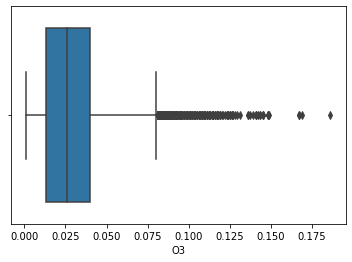

In [95]:
import seaborn as sns
sns.boxplot(data_104['O3'])

25047


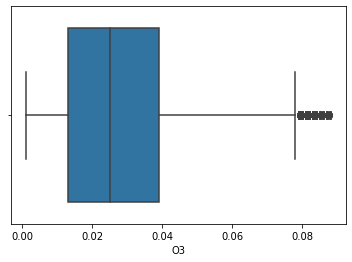

In [96]:
from scipy import stats
z = np.abs(stats.zscore(data_104['O3']))
threshold = 3
#print(len(np.where(z > 3)))
data_104_Rout = data_104[(z < 3)]
print(len(data_104_Rout))
sns.boxplot(data_104_Rout['O3'])

In [97]:
df=data_104_Rout['O3']
df=df.values
df=df.reshape(df.shape[0],1)
print(df.shape)

(25047, 1)


In [98]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
print(min(df),max(df))
list_=[]
for i in range (0,df_scaled.shape[0]):
  list_.append(df_scaled[i][0])
print(len(list_))
print(min(list_),max(list_))


[0.001] [0.088]
25047
0.0 1.0


In [99]:
window_size=5
y=[]
for i in range (0,len(list_)-window_size):
  x=list_[i:i+window_size]
  y.append(x)
print(len(y),y[0])


25042 [0.022988505747126436, 0.022988505747126436, 0.022988505747126436, 0.022988505747126436, 0.022988505747126436]


In [100]:
matrix=np.matrix(y)
print(matrix.shape)
new_data = pd.DataFrame(matrix,columns=['x1','x2','x3','x4','y'])
new_data.head(10)


(25042, 5)


,x1,x2,x3,x4,y
0,0.022989,0.022989,0.022989,0.022989,0.022989
1,0.022989,0.022989,0.022989,0.022989,0.022989
2,0.022989,0.022989,0.022989,0.022989,0.022989
3,0.022989,0.022989,0.022989,0.022989,0.022989
4,0.022989,0.022989,0.022989,0.022989,0.034483
5,0.022989,0.022989,0.022989,0.034483,0.045977
6,0.022989,0.022989,0.034483,0.045977,0.068966
7,0.022989,0.034483,0.045977,0.068966,0.068966
8,0.034483,0.045977,0.068966,0.068966,0.068966
9,0.045977,0.068966,0.068966,0.068966,0.068966


In [101]:
print(matrix[:,4])

[[0.02298851]
 [0.02298851]
 [0.02298851]
 ...
 [0.1954023 ]
 [0.14942529]
 [0.09195402]]


In [102]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(matrix[:,0:4],matrix[:,4],test_size=0.33, random_state=42)
lm =linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'linear_regressor_Rout.pkl')
from google.colab import files
files.download('linear_regressor_Rout.pkl')
print(prediction.shape,prediction[0:5])

(8264, 1) [[0.30674457]
 [0.20628968]
 [0.54162113]
 [0.07190607]
 [0.18428944]]


In [103]:
print(model.score(X_train,y_train))
print(model.intercept_)
print(model.coef_)

0.8855582716504734
[0.03332729]
[[-0.05163239  0.02800051 -0.36360853  1.28052892]]


In [104]:
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

mean squared eror :  0.005026770753209915
absolute mean error :  0.049649537381507354
0.8877659806897991


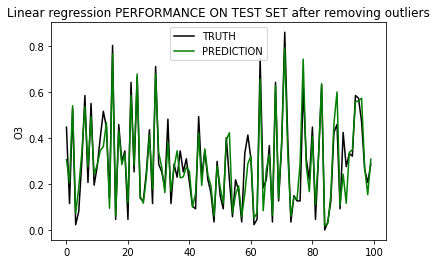

In [105]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Linear regression PERFORMANCE ON TEST SET after removing outliers')
plt.ylabel('O3')
plt.legend()
plt.show()

(25317, 1)
[0.001] [0.186]
25317
0.0 1.0
25312 [0.010810810810810806, 0.010810810810810806, 0.010810810810810806, 0.010810810810810806, 0.010810810810810806]
(8353, 1) [[0.0388065 ]
 [0.1360679 ]
 [0.11728773]
 [0.24400574]
 [0.31222148]]
mean squared eror :  0.0011408630990216836
absolute mean error :  0.02358306862773176
0.9042453792699903


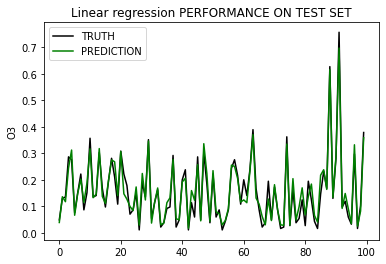

In [106]:
# IMPLEMENTING LINEAR REGRESSION WITHOUT REMOVING OUTLIERS
df=data_104['O3']
df=df.values
df=df.reshape(df.shape[0],1)
print(df.shape)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
print(min(df),max(df))
list_=[]
for i in range (0,df_scaled.shape[0]):
  list_.append(df_scaled[i][0])
print(len(list_))
print(min(list_),max(list_))
window_size=5
y=[]
for i in range (0,len(list_)-window_size):
  x=list_[i:i+window_size]
  y.append(x)
print(len(y),y[0])
matrix= np.matrix(y)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(matrix[:,0:4],matrix[:,4],test_size=0.33, random_state=42)
lm =linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'linear_regressor.pkl')
from google.colab import files
files.download('linear_regressor.pkl')
print(prediction.shape,prediction[0:5])
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Linear regression PERFORMANCE ON TEST SET')
plt.ylabel('O3')
plt.legend()
plt.show()

In [107]:
# BAYESIAN RIDGE REGRESSION
from sklearn import linear_model
from statsmodels.tsa.ar_model import AR
model = linear_model.BayesianRidge()

model.fit(X_train,y_train )
prediction=model.predict(X_test)
joblib.dump(model,'bayesian_regressor.pkl')
from google.colab import files
files.download('bayesian_regressor.pkl')
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))

print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean squared eror :  0.0011408653594483329
absolute mean error :  0.023583368914543826
0.9042451895484569


In [108]:
# IMLEMENTING  RANDOM FOREST ALGORITHM
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(max_depth=8, random_state=0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'randomforest_regressor.pkl')
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


mean squared eror :  0.0011403040205567587
absolute mean error :  0.023472656137316843
0.904292303696254


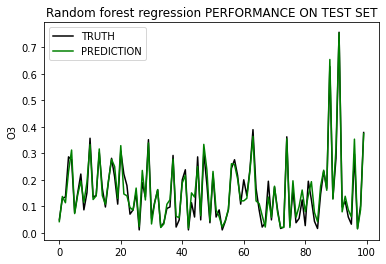

truth :  [[0.04864865]
 [0.12972973]
 [0.13513514]
 [0.28648649]
 [0.27567568]
 [0.07567568]
 [0.15135135]
 [0.22162162]
 [0.08648649]
 [0.15135135]]
prediction :  [0.04211782 0.13710069 0.1133368  0.23004763 0.31225626 0.07242078
 0.14438742 0.19494976 0.11508593 0.19113315]


In [109]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Random forest regression PERFORMANCE ON TEST SET')
plt.ylabel('O3')
plt.legend()
plt.show()
print('truth : ',y_test[0:10])
print('prediction : ',prediction[0:10])

In [110]:
# RIDGE REGRESSION
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'ridge_regressor.pkl')
from google.colab import files
files.download('ridge_regressor.pkl')
print(mean_squared_error(y_test,prediction))
print(mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))


0.0011494414938681202
0.02375767217790957
0.9035253796962489


In [111]:
# IMPLEMENTING SUPPORT VECTOR
from sklearn.svm import LinearSVR
model= LinearSVR()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean squared eror :  0.0011510800170066744
absolute mean error :  0.023157609400799462
0.9033878556043362


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


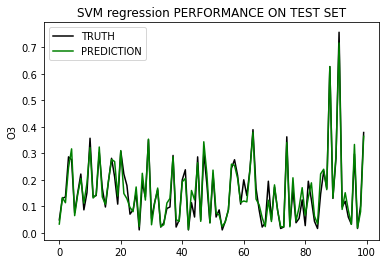

In [112]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('SVM regression PERFORMANCE ON TEST SET')
plt.ylabel('O3')
plt.legend()
plt.show()

In [113]:
# IMPLEMENTING A NEURAL NETWORK
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X)
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='relu'))


model.compile(optimizer = "adam", loss ='mse', 
          metrics =["accuracy"])
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
16959/16959 [==============================] - 2s 97us/step - loss: 0.0015 - accuracy: 0.0021
Epoch 2/100
16959/16959 [==============================] - 2s 90us/step - loss: 0.0012 - accuracy: 0.0021
Epoch 3/100
16959/16959 [==============================] - 1s 88us/step - loss: 0.0012 - accuracy: 0.0021
Epoch 4/100
16959/16959 [==============================] - 1s 86us/step - loss: 0.0012 - accuracy: 0.0021
Epoch 5/100
16959/16959 [==============================] - 2s 90us/step - loss: 0.0012 - accuracy: 0.0021
Epoch 6/100
16959/16959 [==============================] - 1s 86us/step - loss: 0.0012 - accuracy: 0.0021
Epoch 7/100
16959/16959 [==============================] - 1s 86us/step - loss: 0.0012 - accuracy: 0.0021
Epoch 8/100
16959/16959 [==============================] - 1s 85us/step - loss: 0.0012 - accuracy: 0.0021
Epoch 9/100
16959/16959 [==============================] - 1s 88us/step - loss: 0.0012 - accuracy: 0.0021
Epoch 10/100
16959/16959 [====================

dict_keys(['loss', 'accuracy'])


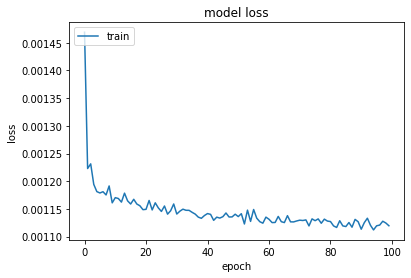

mean squared error :  0.0011102194110902022
mean absolute error :  0.023157609400799462
0.9033878556043362


In [114]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
y_pred = model.predict(X_test)
print('mean squared error : ',mean_squared_error(y_test,y_pred))
print('mean absolute error : ',mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))
#Converting predictions to label


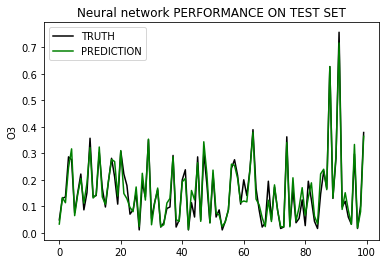

In [115]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Neural network PERFORMANCE ON TEST SET')
plt.ylabel('O3')
plt.legend()
plt.show()

In [116]:
print(X_train)
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

print(X_train.shape)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
print(X_train.shape)

[[0.32432432 0.36216216 0.4        0.46486486]
 [0.04864865 0.04324324 0.04864865 0.04324324]
 [0.16756757 0.15675676 0.15675676 0.2       ]
 ...
 [0.16756757 0.20540541 0.21081081 0.2       ]
 [0.08648649 0.05945946 0.03783784 0.05945946]
 [0.13513514 0.12432432 0.07027027 0.03243243]]
(16959, 4)
(16959, 4, 1)


In [117]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
#regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
16959/16959 [==============================] - 9s 529us/step - loss: 0.0049
Epoch 2/100
16959/16959 [==============================] - 7s 420us/step - loss: 0.0013
Epoch 3/100
16959/16959 [==============================] - 7s 423us/step - loss: 0.0012
Epoch 4/100
16959/16959 [==============================] - 7s 421us/step - loss: 0.0012
Epoch 5/100
16959/16959 [==============================] - 7s 418us/step - loss: 0.0012
Epoch 6/100
16959/16959 [==============================] - 7s 425us/step - loss: 0.0012
Epoch 7/100
16959/16959 [==============================] - 7s 418us/step - loss: 0.0012
Epoch 8/100
16959/16959 [==============================] - 7s 415us/step - loss: 0.0012
Epoch 9/100
16959/16959 [==============================] - 7s 416us/step - loss: 0.0012
Epoch 10/100
16959/16959 [==============================] - 7s 415us/step - loss: 0.0012
Epoch 11/100
16959/16959 [==============================] - 7s 422us/step - loss: 0.0012
Epoch 12/100
16959/16959 [====

dict_keys(['loss'])


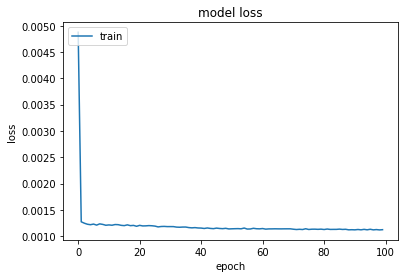

mean square error : 0.0010900661644055501
mean absolute error :  0.023196557199388634
0.9085088541887477


In [118]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
prediction = regressor.predict(X_test)
print("mean square error :" ,mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print("mean absolute error : ",mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

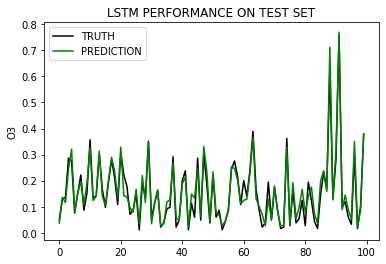

In [119]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('LSTM PERFORMANCE ON TEST SET')
plt.ylabel('O3')
plt.legend()
plt.show()

In [0]:
#joblib.dump(regressor,'lstm_regressor.pkl')
#from google.colab import files
#files.download('lstm_regressor.pkl')